<a href="https://colab.research.google.com/github/catalinacorreal98/TextAnalysis_FinalProject/blob/main/From_Headlines_to_Forecasts_Catalina_Correal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **From Headlines to Forecasts: Predicting Economic and Financial Indicators Through News**
# Final project - Intro to Text Analysis in Python - Columbia University
## By: Catalina Correal Aguilera - cc5220

# **Introduction**

### **Motivation**
At present, governments monitor the state of the economy primarily based on quarterly and monthly indicators, in which in many cases there is a significant lag between the period studied and the release date. For example, the US quarterly GDP report had an advance estimate almost one month after the end of the quarter, and it included revisions for two additional months. In particular, the lag and frequency of these reports are worse in developing economies that don’t have all the technical and human resources to follow many indicators in a swift manner. Exploring alternative ways to obtain timely data can be crucial for mitigating unexpected economic complications and for facilitating prompt decision-making, especially in areas where there is significant inertia in the system.


###**Research Question**
This work seeks to explore if high-frequency data from text analysis of national news can help predict the behavior of economic and financial indicators with a smaller lag compared to current indicators. I propose that the leverage of this type of data can allow us to predict economic performance and generate early warning signals on the current state of the economy.

# **Data Collection**
To test this, I used the [Factiva database](https://resolver.library.columbia.edu/AUQ3920) to retrieve news articles. During the search, I applied filters for language (English), type of news (Financial/Commodity News or Economic News), and year. After conducting the search, the results were sorted by relevance. I examined a period of five years, aiming to sample a total of 3,000 articles, equal to 600 articles per year. However, Factiva only allowed 100 articles to be downloaded at a time. To address this, I downloaded 100 articles at a time with an Index format and an HTML structure, pasted them into a .txt file, and repeated the process. All the files were saved manually in the same folder. This resulted in 30 .txt files, which will be imported in the next parts.

The following blocks of code were written using the material covered in class ([Krisel, 2023](https://github.com/intro-to-text-analysis-SIPA-S23/syllabus)), ocassional assistance from ChatGPT and prior knowledge of data cleaning and data analysis.

# **HTML Parsing**
As the text is HTML, I need to extract the tabular data from the HTML and structure it into DataFrames. In order to do this, the function `read_html` from the pandas library is designed to parse HTML content and extract any tabular data it finds, returning a list of DataFrames, with each DataFrame corresponding to a table found in the HTML content.


In [1]:
#Import all the packages to use for this work
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Connect it with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Indicate the path were all the files are
path = '/content/drive/MyDrive/Text Analysis Python/Project/Final project'
path

'/content/drive/MyDrive/Text Analysis Python/Project/Final project'

In [4]:
#create a list with all the txt name files I want to import (30 in total)
artlists = [f'articles{number}.txt' for number in range(1,31)]

#Create an empty list to add all our news in the next step
transposed_dfs = []

#The following for-loop processes each .txt file by reading its content, parsing HTML tables into DataFrames.
# It then appends the transposed DataFrames to the list
for x in artlists:
  file_name = x
  file_path = os.path.join(path, file_name)
  with open(file_path, "r", encoding="utf-8") as file:
    html_content = file.read()
  data2 = pd.read_html(html_content, index_col = 0)
  for df in data2:
    transposed_dfs.append(df.T)




<ipython-input-4-0c6a688e2321>:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data2 = pd.read_html(html_content, index_col = 0)
<ipython-input-4-0c6a688e2321>:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data2 = pd.read_html(html_content, index_col = 0)
<ipython-input-4-0c6a688e2321>:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data2 = pd.read_html(html_content, index_col = 0)
<ipython-input-4-0c6a688e2321>:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data2 = pd.read_html(html_

# **Data Cleaning**
In order to perform data analysis, it is necessary to first have a clean, unified DataFrame with one news per row. First, the transposed_dfs list contains individual DataFrames that need to be unified into one DataFrame. To achieve this, the `.concat` function allows us to combine all the dataframes in the list into a single DataFrame row-wise, including all the columns from the original list elements. I also discarded the rows that were completely empty or did not contain news.

In [5]:
#unify the Dataframes in the list into a final DataFrame
final_df = pd.concat(transposed_dfs, axis=0, join='outer', ignore_index=True)

#drop rows that are empty or do not contain news
final_df = final_df.dropna(axis=0, how='all')
final_df = final_df.loc[final_df['Dow Jones Factiva']!='Dow Jones',]

#check the size of the DataFrame to see if it corresponds to the 3000 news
print('Dimensions of df:',final_df.shape)
final_df.head(5)

Dimensions of df: (3000, 26)


,Dow Jones Factiva,SE,HD,WC,PD,SN,SC,ED,PG,LA,...,AN,BY,ET,CO,IPC,IPD,IN,CLM,"© 2024 Factiva, Inc. All rights reserved.",CX
1,NaN,News,? Debt fears spook US [...],43 words,28 November 2019,Financial Times,FTFT,1; Middle East,1,English,...,Document FTFT000020191128efbs0004m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Economy,Trump Repeats Calls for Fed to Stimulate Growt...,394 words,30 April 2019,WSJ Pro Central Banking,RSTPROCB,NaN,NaN,English,...,Document RSTPROCB20190430ef4u000dx,By Nick Timiraos,04:10 PM,fed : Board of Governors of the Federal Reserv...,G/EXE | G/FED | N/BON | N/CBI | N/CMR | N/DJN ...,DONALD TRUMP | FEDERAL RESERVE | FED POLICY | ...,NaN,NaN,NaN,NaN
3,NaN,WSJ Pro,Eurozone Economy Steady as Unemployment Falls ...,565 words,1 July 2019,WSJ Pro Central Banking,RSTPROCB,NaN,NaN,English,...,Document RSTPROCB20190701ef710002t,By Paul Hannon and Tom Fairless,07:50 AM,basf : BASF SE | eurcb : European Central Bank,BAS.XE | BASFY | INFO | M/EUR | N/CBK | N/CMR ...,EUROZONE ECONOMY | EUROZONE MANUFACTURING | EU...,ibnk : Banking/Credit | ifinal : Financial Ser...,NaN,NaN,NaN
4,NaN,WSJ Pro,Pro Bankruptcy Briefing: Bumble Bee Foods Prep...,637 words,18 November 2019,WSJ Pro Bankruptcy,RSTPROBK,NaN,NaN,English,...,Document RSTPROBK20191118efbi00001,NaN,09:23 AM,"bmblb : Bumble Bee Foods, LLC | ellmcz : Ellio...",APO | CZR | ELLA.XX | EPEGQ | ERI | ESL.LN | I...,"Zell, Sam | PRO | WSJ-PRO-DEBT | Pro Bankruptc...",i415 : Seafood Products | i1 : Energy | i13 : ...,NaN,NaN,NaN
5,NaN,World,China's Foreign Reserves Grew for Fifth Straig...,154 words,7 April 2019,WSJ Pro Central Banking,RSTPROCB,NaN,NaN,English,...,Document RSTPROCB20190407ef4700001,NaN,08:32 AM,NaN,M/USD | N/CMR | N/CNW | N/DJN | N/FRX | N/GENI...,FOREIGN RESERVES | PRO | SYND | WSJ-PRO-CB | W...,NaN,NaN,NaN,NaN


The second part is to verify that the distribution of articles per month is relatively even. Since I only ensured there were 600 articles per year, it is possible that they are concentrated in specific months. This could be especially the case because I sorted them by relevance, so the most relevant news might come from only a few months, which could affect the estimates.
To check this, I converted the 'Publication Date' column (labeled as 'PD' in the DataFrame) to a pandas datetime object and then counted the number of articles per month.

min: 30
max: 88


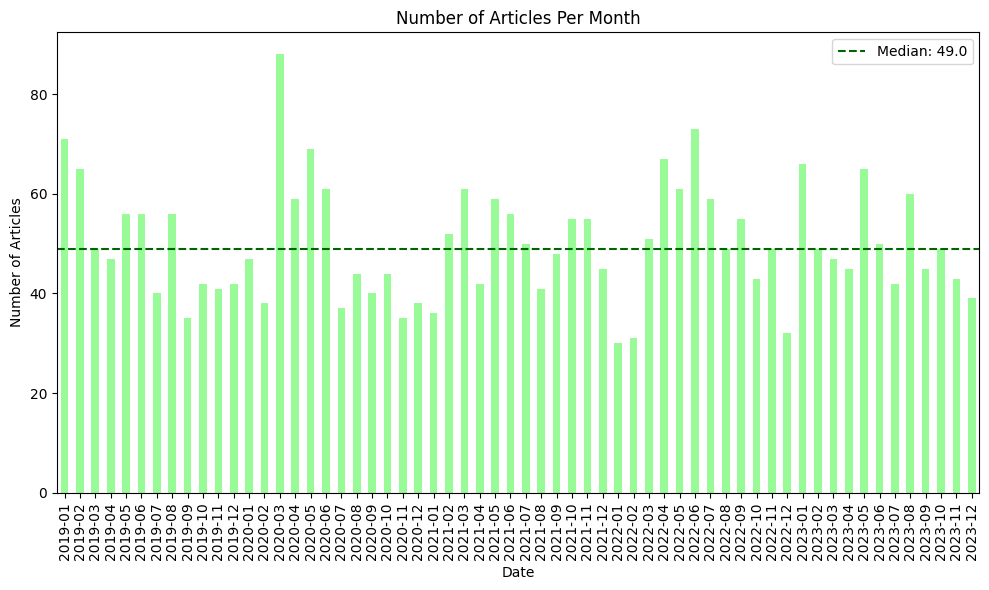

In [6]:
#change the publication date to a datetime object
final_df['PD'] = pd.to_datetime(final_df['PD'], format='%d %B %Y')
# Extract the month and year from the 'PD' column (ensure it's in datetime format)
final_df['month_year'] = final_df['PD'].dt.to_period('M')
#count the number of news by month
artbydate = final_df.groupby('month_year').size()
#calculate the median
medianarticles = artbydate.median()
#calculate the minimum number of news and the maximum number of news
print('min:',artbydate.min())
print('max:',artbydate.max())

#Create a bar graph of number of news per month
artbydate.plot(kind='bar', figsize=(10,6), color='palegreen')
plt.axhline(y=medianarticles, color='darkgreen', linestyle='--', label=f'Median: {medianarticles:.1f}')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Per Month')
plt.legend()
plt.tight_layout()
plt.show()

The graph above shows that the median number of news articles per month is 49, with a minimum of 30 and a maximum of 88 articles per month. This suggests that, with at least 30 observations per month, the monthly sample size is large enough for the Central Limit Theorem (CLT) to apply, allowing for stronger conclusions. However, a limitation of this study is that increasing the number of news articles per month (e.g., to at least 100) would improve the precision of the results. Nonetheless, we can proceed with the current results.

# **Sentiment Analysis**
To analyze the sentiment of news articles, I used a distilled model of the RoBERTa base model. The basis of this model is BERT, a natural language processing model developed by Google that learns bi-directional representations of text to significantly improve contextual understanding of unlabeled text across many different tasks ([NVIDIA](https://www.nvidia.com/en-us/glossary/bert/), n.d.) BERT’s innovation was to learn bidirectional representations with transformers, which "process words in relation to all the other words in a sentence at once rather than individually, using attention mechanisms to gather information about the relevant context of a word and encoding that context in a rich vector that represents it. The model learns how a given word’s meaning is derived from every other word in the segment."

This fine-tuned model is an open-source pre-trained model that can be found on [HuggingFace](https://huggingface.co/mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis), has 6 layers, 768 dimension and 12 heads, totalizing 82M parameters. Also, it has been downloaded more than 1 million times.

The model generates three sentiment scores for each text: positive, neutral, and negative, with all scores summing to 1. These scores will be applied to each news article in the DataFrame (each row) to assess the overall sentiment of each article. Because the context window (the amount of text a model can process at once) is limited, I used only the Lead Paragraph ('LD'), which typically conveys the main content and sentiment of the news. Then, because the result is returned as a single list containing all the scores, I created three new columns to separate each score.

In [7]:
#install the following if not installed
#pip install torch torchvision torchaudio
#pip install transformers[torch]

#importing the model
from transformers import pipeline
modelnews = pipeline("text-classification",
                     model = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
                     device = -1, #indicate to use the CPU instead of GPU
                     # Return scores for all classes
                     top_k = None
                     )


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
#if applying the model shows an error, is because the  text has more tokens than what the context
#window can process. For those cases, leave the score empty.
def try_except_modelnews(x):
    try:
        return modelnews(x)
    except Exception:
        return None

#create a new column where it contains all three scores, using the 'LP' column as an input for each row (one news)
final_df['scores'] = final_df['LP'].apply(try_except_modelnews)

In [9]:
#separate the scores that are stored together into different columns
#creating a function that depends on the name of the label
def scoresentiment(x, label):
    for item in x[0]:  #checks each item of the list, in this case each dictionary
        if item['label'] == label:
            return item['score']

#create the columns for each sentiment
final_df['negative'] = final_df['scores'].apply(lambda x: scoresentiment(x, 'negative'))
final_df['neutral'] = final_df['scores'].apply(lambda x: scoresentiment(x, 'neutral'))
final_df['positive'] = final_df['scores'].apply(lambda x: scoresentiment(x, 'positive'))

I analyzed the distribution of positive and negative scores, as these are the scores most relevant to economic and financial activity. Positive news is often associated with growth, optimism, and favorable market conditions, while negative news typically signals downturns, risks, and adverse events. Both types of sentiment can directly influence decision-making and market behavior. In contrast, neutral scores tend to represent news that lacks strong sentiment, which is less likely to drive significant economic or financial impact. To facilitate this analysis, I created two histograms: one for negative scores and one for positive scores.

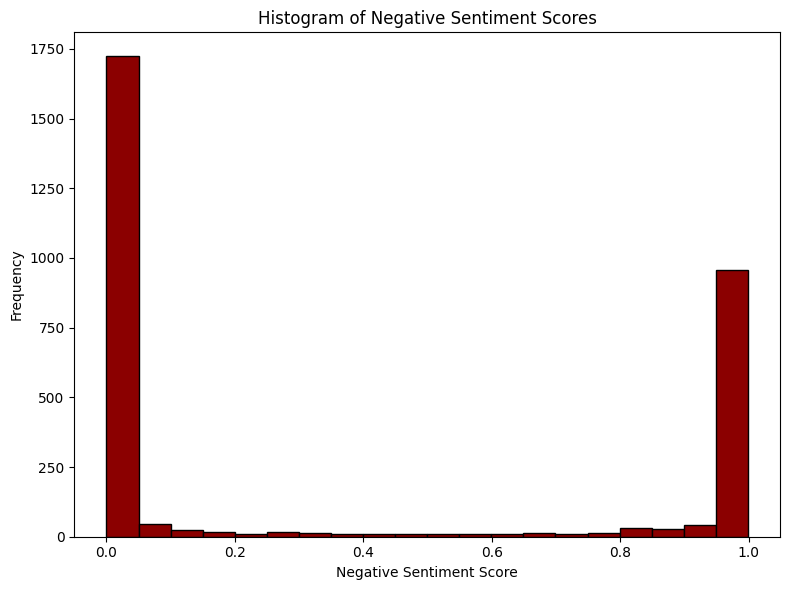

In [10]:
#Create a histogram showing the distribution of negative sentiment scores for the 3000 news
plt.figure(figsize=(8, 6))
plt.hist(final_df['negative'], bins=20, color='darkred', edgecolor='black')

# Customize the plot
plt.title('Histogram of Negative Sentiment Scores')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

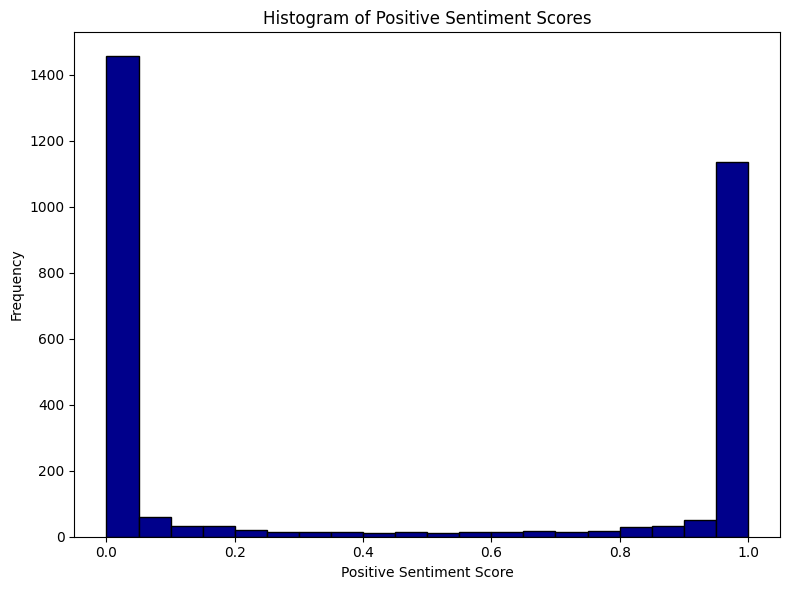

In [11]:
#Create a histogram showing the distribution of positive sentiment scores for the 3000 news
plt.figure(figsize=(8, 6))
plt.hist(final_df['positive'], bins=20, color='darkblue', edgecolor='black')

# Customize the plot
plt.title('Histogram of Positive Sentiment Scores')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

There is a significant proportion of news that are either negative or positive, as shown in the graphs above. However, a small proportion of news is neutral, which does not add value to the analysis and may even weaken the relationships. Therefore, it is preferable to retain news that are highly positive or highly negative (with scores above 0.8). As a result, the sample is reduced from 3000 to 2307 news.

By creating a boolean variable where 1 represents positive news and 0 represents negative news, we can observe the evolution of the share of positive and negative news over the period studied (2019-2023). The graph below illustrates how peaks in the share of negative news are associated with significant negative economic events, such as the US-China trade war in August 2019, the COVID-19 pandemic between February and September 2020, and the sharp increase in inflation and interest rates at the end of 2022.

In [12]:
#keep very positive or very negative news
final_df2 = final_df.loc[(final_df['negative']>0.8) | (final_df['positive']>0.8),].reset_index(drop=True)

#create a new boolean variable, 1 if it is a positive news, 0 if otherwise (thus, negative)
final_df2['pos_neg'] = 0
final_df2.loc[final_df2['positive'] > 0.8, 'pos_neg'] = 1
final_df2.shape

(2307, 32)

In [13]:
#Group by month and year the number of positive news and total news
fract_pos = final_df2.groupby('month_year').agg(positivenews=('pos_neg', 'sum'),total_news=('pos_neg', 'count'))
#Create a variable that is the number of negative news (total - positive)
fract_pos['negativenews'] = fract_pos['total_news'] - fract_pos['positivenews']
#Create variables that are the share of positive and negative news relative to the total of news
fract_pos['negnews'] = fract_pos['negativenews']/fract_pos['total_news']
fract_pos['posnews'] = fract_pos['positivenews']/fract_pos['total_news']
fract_pos.head(5)

,positivenews,total_news,negativenews,negnews,posnews
month_year,,,,,
2019-01,29,58,29,0.500000,0.500000
2019-02,27,51,24,0.470588,0.529412
2019-03,22,39,17,0.435897,0.564103
2019-04,19,33,14,0.424242,0.575758
2019-05,15,44,29,0.659091,0.340909


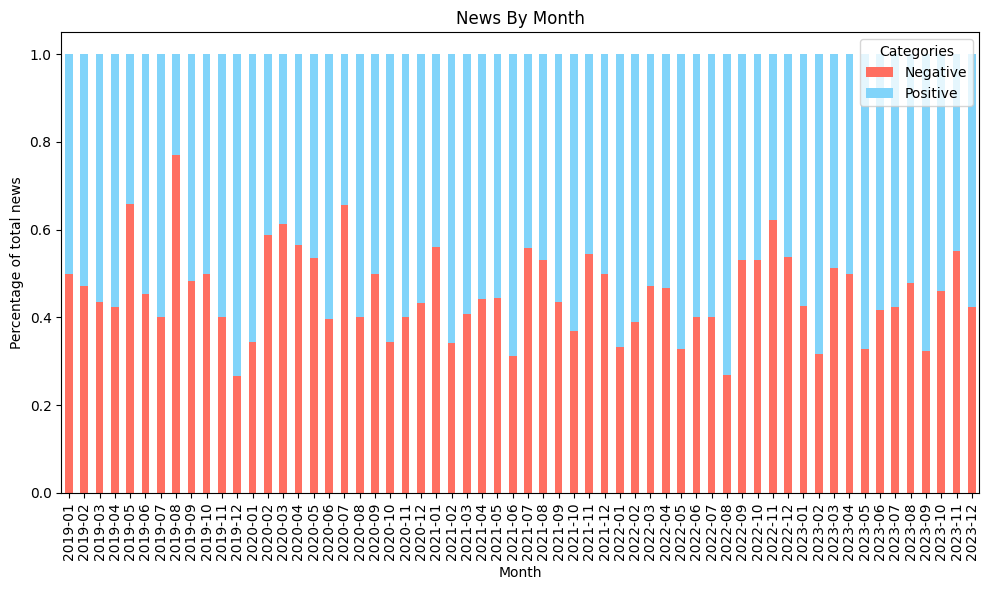

In [14]:
#Created a stacked bar graph with the share of positive and negative news
fraction_news =  fract_pos[['negnews', 'posnews']]

fraction_news.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF6F61', '#81D4FA'])

# Customize the plot
plt.title('News By Month')
plt.xlabel('Month')
plt.ylabel('Percentage of total news')
plt.legend(['Negative', 'Positive'], title='Categories')

# Show the plot
plt.tight_layout()
plt.show()

# **Economic and financial indicators**
To continue with the analysis, I imported two excel databases that I created manually. This includes the following indicators with its sources:

*   **S&P500:** Represents the performance of the 500 largest publicly traded companies in the U.S. ([Source: Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history/))
*   **VIX:** Measures market volatility and investor sentiment ([Source: Yahoo Finance](https://finance.yahoo.com/quote/%5EVIX/history/))
*   **Unemployment Rate:** The percentage of the labor force that is unemployed ([Source: Federal Reserve](https://fred.stlouisfed.org/series/UNRATE))
*   **Industrial Production Index:** Tracks the total production of the industrial sector in the U.S. ([Source: Federal Reserve](https://fred.stlouisfed.org/series/INDPRO))
*   **Gross Domestic Product (GDP):** The total value of goods and services produced in the U.S., *quarterly frequency* ([Source: Bureau of Economic Analysis](https://www.bea.gov/data/gdp/gross-domestic-product))




In [15]:
#!pip install openpyxl pandas

In [16]:
#Import the monthly indicators (SP500, VIX, unemployment rate, industrial production)
econ_ind_df = pd.read_excel(os.path.join(path, 'Econ Indicators.xlsx'))
#convert the date column to a datetime object and set it as the index
econ_ind_df['date'] = pd.to_datetime(econ_ind_df['date'])
econ_ind_df.set_index('date', inplace=True)
econ_ind_df.index = econ_ind_df.index.to_period('M')
econ_ind_df.head(5)

,SP500,VIX,Unempl,Ind_prod
date,,,,
2019-01,2704.10,16.57,4.0,103.3598
2019-02,2784.49,14.78,3.8,102.8251
2019-03,2834.40,13.71,3.8,102.8361
2019-04,2945.83,13.12,3.7,102.2748
2019-05,2752.06,18.71,3.6,102.4176


In [17]:
#Import the quarterly indicator: GDP
gdp_df = pd.read_excel(os.path.join(path, 'GDP_US.xlsx'))
#convert the date column to a datetime object and set it as the index
gdp_df['date'] = pd.to_datetime(gdp_df['date'])
gdp_df.set_index('date', inplace=True)
gdp_df.index = gdp_df.index.to_period('Q')
gdp_df.head(5)

,GDP
date,
2019Q1,1.933237
2019Q2,2.242128
2019Q3,2.796875
2019Q4,3.351408
2020Q1,1.280370


# **Results and Discussion**
To evaluate the research question, I merged the DataFrame containing the share of positive and negative news (which were created using the sentiment scores in the previous sector) with the economic and financial indicators at the monthly level. This allowed me to assess potential correlations and determine whether the share of negative news could serve as inputs for prediction of economic and financial indicators. Analyzing the share of negative news is equivalent to analyzing the share of positive news, as they are complements, but it moves in the opposite direction.

The graphs below depicts that the correlation between the share of negative news and financial indicators (S&P 500 and VIX) is stronger than that with economic indicators (Unemployment rate, GDP, and Industrial Production Index). This suggests that financial markets are more immediately sensitive to shifts in sentiment captured by news coverage, while economic indicators may reflect these effects more gradually or be influenced by a broader set of structural factors. Nonetheless, the direction of the correlation across all five scenarios aligns with theoretical expectations, underscoring the consistency of the observed relationships.

In [18]:
#Join the DataFrame of positive and negative news with their respective shares and the DataFrame with the economic indicators
completedf = pd.concat([fract_pos,econ_ind_df], axis=1)
completedf.head(5)

,positivenews,total_news,negativenews,negnews,posnews,SP500,VIX,Unempl,Ind_prod
2019-01,29,58,29,0.500000,0.500000,2704.10,16.57,4.0,103.3598
2019-02,27,51,24,0.470588,0.529412,2784.49,14.78,3.8,102.8251
2019-03,22,39,17,0.435897,0.564103,2834.40,13.71,3.8,102.8361
2019-04,19,33,14,0.424242,0.575758,2945.83,13.12,3.7,102.2748
2019-05,15,44,29,0.659091,0.340909,2752.06,18.71,3.6,102.4176


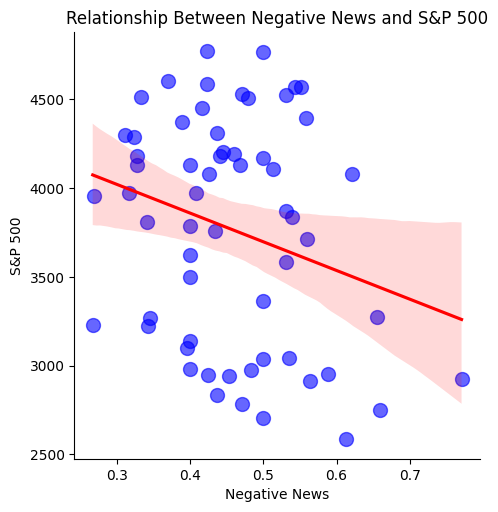

In [19]:
#Created correlation graphs between the share of negative news and the S&P500
sns.lmplot(x='negnews', y='SP500', data=completedf, line_kws={'color': 'red'}, scatter_kws={'s': 100, 'color': 'blue', 'alpha': 0.6})

# Display the plot
plt.title("Relationship Between Negative News and S&P 500")
plt.xlabel("Negative News")
plt.ylabel("S&P 500")
plt.show()

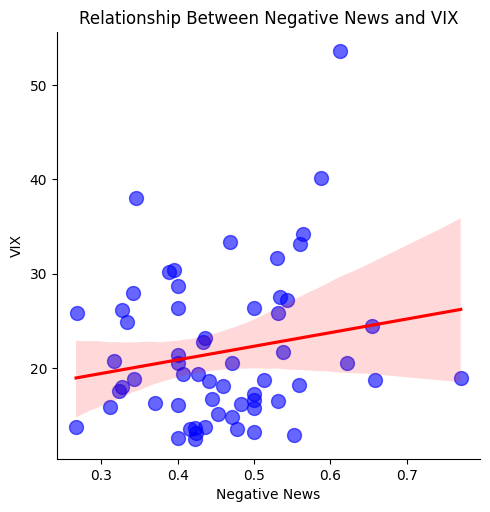

In [20]:
#Created correlation graphs between the share of negative news and the VIX
sns.lmplot(x='negnews', y='VIX', data=completedf, line_kws={'color': 'red'}, scatter_kws={'s': 100, 'color': 'blue', 'alpha': 0.6})

# Display the plot
plt.title("Relationship Between Negative News and VIX")
plt.xlabel("Negative News")
plt.ylabel("VIX")
plt.show()

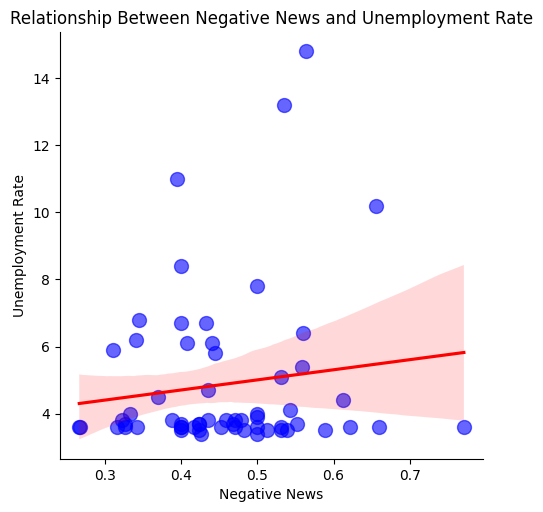

In [21]:
#Created correlation graphs between the share of negative news and the Unemployment rates
sns.lmplot(x='negnews', y='Unempl', data=completedf, line_kws={'color': 'red'}, scatter_kws={'s': 100, 'color': 'blue', 'alpha': 0.6})

# Display the plot
plt.title("Relationship Between Negative News and Unemployment Rate")
plt.xlabel("Negative News")
plt.ylabel("Unemployment Rate")
plt.show()


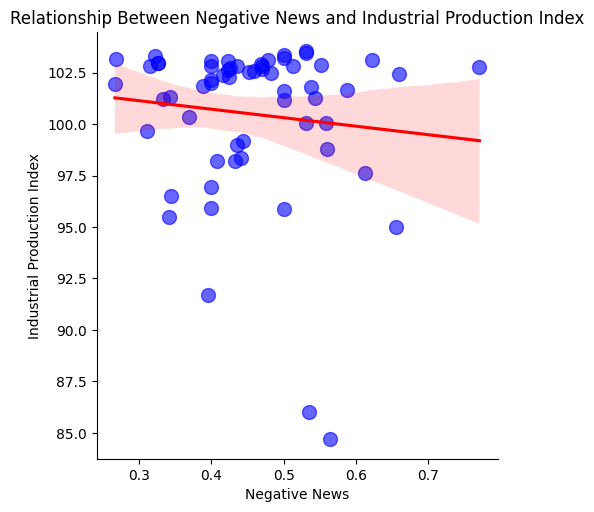

In [22]:
#Created correlation graphs between the share of negative news and the Industrial Production Index
sns.lmplot(x='negnews', y='Ind_prod', data=completedf, line_kws={'color': 'red'}, scatter_kws={'s': 100, 'color': 'blue', 'alpha': 0.6})

# Display the plot
plt.title("Relationship Between Negative News and Industrial Production Index")
plt.xlabel("Negative News")
plt.ylabel("Industrial Production Index")
plt.show()


In [23]:
#Aggregate the DataFrame at a quarterly level to be able to compare it with the GDP
quarterlydf = completedf.resample('Q').mean()
quarterlydf.head(4)

<ipython-input-23-637f741e65b7>:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  quarterlydf = completedf.resample('Q').mean()


,positivenews,total_news,negativenews,negnews,posnews,SP500,VIX,Unempl,Ind_prod
2019Q1,26.000000,49.333333,23.333333,0.468829,0.531171,2774.330000,15.020000,3.866667,103.007000
2019Q2,19.000000,39.666667,20.666667,0.511905,0.488095,2879.883333,15.636667,3.633333,102.411633
2019Q3,14.666667,35.666667,21.000000,0.551197,0.448803,2961.193333,17.113333,3.600000,102.415733
2019Q4,18.000000,29.333333,11.333333,0.388889,0.611111,3136.440000,13.206667,3.600000,101.893100


In [24]:
#Join the previous DataFrame with the GDP DataFrame
quarterlydf = pd.concat([quarterlydf,gdp_df], axis=1)
quarterlydf.head(5)

,positivenews,total_news,negativenews,negnews,posnews,SP500,VIX,Unempl,Ind_prod,GDP
2019Q1,26.000000,49.333333,23.333333,0.468829,0.531171,2774.330000,15.020000,3.866667,103.007000,1.933237
2019Q2,19.000000,39.666667,20.666667,0.511905,0.488095,2879.883333,15.636667,3.633333,102.411633,2.242128
2019Q3,14.666667,35.666667,21.000000,0.551197,0.448803,2961.193333,17.113333,3.600000,102.415733,2.796875
2019Q4,18.000000,29.333333,11.333333,0.388889,0.611111,3136.440000,13.206667,3.600000,101.893100,3.351408
2020Q1,20.333333,43.666667,23.333333,0.514665,0.485335,2921.443333,37.496667,3.833333,100.205000,1.280370


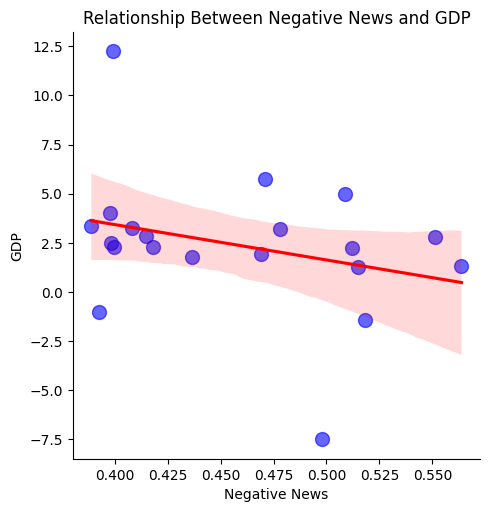

In [25]:
#Created correlation graphs between the share of negative news and the GDP
sns.lmplot(x='negnews', y='GDP', data=quarterlydf, line_kws={'color': 'red'}, scatter_kws={'s': 100, 'color': 'blue', 'alpha': 0.6})

# Display the plot
plt.title("Relationship Between Negative News and GDP")
plt.xlabel("Negative News")
plt.ylabel("GDP")
plt.show()

#**Limitations**
This study presents the following limitations, which can affect the strength of the correlation between correlations between news sentiment and economic and financial indicators:


1.   While the **sample size** was sufficient to derive preliminary conclusions, it **may not be large enough to fully represent the state of the economy**. Expanding the dataset could enhance the robustness and generalizability of the findings.
2.   Due to the limitations of the model's context window, only the **leading paragraph** of each news article was analyzed. This approach **can exclude critical information contained in other sections** of the articles, potentially overlooking sentiments that could offer a more comprehensive representation of the news. Further analysis including the full text of articles could lead to more accurate sentiment scores.
3. The use of a **high threshold** (0.8) for keeping positive and negative sentiment scores **likely excludes news articles that can be useful** as they are significantly positive or negative but fall below this threshold. Lowering the threshold or experimenting with alternative threshold values could capture a broader range of sentiment and improve the precision of the estimations.
4. The dataset **did not contain a sufficient volume of news articles per day or week to allow for analysis at a shorter temporal frequency**. Conducting the study at a higher frequency could provide valuable insights into the immediate and short-term effects of news sentiment on economic and financial indicators.


# **Conclusion**

This work seeks to explore whether high-frequency data from text analysis of national news can help predict the behavior of economic and financial indicators with a smaller lag compared to traditional indicators. The findings shed light on the potential of using news sentiment (positive or negative) as a predictive tool for these indicators, suggesting that shifts in sentiment can provide valuable insights into market dynamics and economic performance. Financial indicators, such as the S&P 500 and VIX, exhibit stronger correlations with news sentiment, highlighting their immediate responsiveness to changes in public sentiment. Economic indicators, including unemployment rate, GDP, and the Industrial Production Index, show weaker correlations, reflecting the influence of more gradual and complex underlying factors on their behavior.

Future research should aim to address the identified limitations by expanding the dataset, incorporating full-text analysis, and exploring alternative thresholds for sentiment classification. Addressing these limitations in future research could enhance the robustness and applicability of news-based sentiment analysis for economic and financial forecasting. Nonetheless, this can serve as an useful tool for economic policymakers, specially in developing countries where resources for data collection and analysis are often limited.